<a href="https://colab.research.google.com/github/Biswamitra4599/MRI_Literature_Review/blob/main/Copy_of_Bart_sense_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#USING BART


## Importing System Libraries & Mounting Drive


In [1]:
import os
import sys
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython.display import Image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

if not os.path.exists("path/to/demo_folder"):

	# if the demo_folder directory is not present
	# then create it.
	os.makedirs("path/to/demo_folder")


## Sense Reconstruction
Mahesh

### Setting up the GPU and the appt environment

In [4]:
%%bash

# Use CUDA 10.1 when on Tesla K80

# Estimate GPU Type
GPU_NAME=$(nvidia-smi --query-gpu=gpu_name --format=csv,noheader)

echo "GPU Type:"
echo $GPU_NAME

if [ "Tesla K80" = "$GPU_NAME" ];
then
    echo "GPU type Tesla K80 does not support CUDA 11. Set CUDA to version 10.1."

    # Change default CUDA to version 10.1
    cd /usr/local
    rm cuda
    ln -s cuda-10.1 cuda
    echo "done!!!"
else
    echo "Current GPU supports default CUDA-11."
    echo "No further actions are necessary."
fi

echo "GPU Information:"

# nvidia-smi --query-gpu=gpu_name,driver_version,memory.total --format=csv
# nvcc --version

GPU Type:
Tesla T4
Current GPU supports default CUDA-11.
No further actions are necessary.
GPU Information:


### BART INSTALLATION

1.  Dependencies for BART,
2.  Installation of BART,
3.  Environment Setup.







In [5]:
%%bash

# Install BARTs dependencies
apt-get install -y make gcc libfftw3-dev liblapacke-dev libpng-dev libopenblas-dev &> /dev/null

# Clone Bart
[ -d /content/bart ] && rm -r /content/bart
git clone https://github.com/mrirecon/bart/ bart &> /dev/null
echo "Dependencies Done!!"
pwd

Dependencies Done!!
/content


In [6]:
%%bash
sudo apt-get update
sudo apt-get install -y gcc-12 g++-12


Get:1 https://cli.github.com/packages stable InRelease [3,917 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 https://cli.github.com/packages stable/main amd64 Packages [345 B]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,233 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Pac

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 7.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


In [8]:
%%bash
cd bart

make clean || true

cat << EOF > Makefiles/Makefile.local
PARALLEL=1
CUDA=1
CUDA_BASE=/usr/local/cuda
CUDA_LIB=lib64
OPENBLAS=1
BLAS_THREADSAFE=1
CC=gcc-12
CXX=g++-12
EOF

make -j$(nproc)


echo "#define MAIN_LIST affinereg, avg, bench, bin, bitmask, bloch, cabs, calc, caldir, calmat, carg, casorati, cc, ccapply, cdf97, circshift, coils, compress, conj, conv, conway, copy, cpyphs, creal, crop, cunet, delta, denoise, ecalib, ecaltwo, epg, estdelay, estdims, estmotion, estscaling, estshift, estvar, extract, fakeksp, fft, fftmod, fftrot, fftshift, filter, flatten, flip, fmac, fovshift, gmm, grid, grog, hist, homodyne, ictv, index, interpolate, invert, itsense, join, looklocker, lrmatrix, mandelbrot, measure, mip, mnist, moba, mobafit, morphop, multicfl, ncalib, nlinv, nlinvnet, nlmeans, nnet, noise, normalize, nrmse, nufft, nufftbase, onehotenc, ones, pattern, phantom, phasepole, pics, pocsense, poisson, pol2mask, poly, psf, pulse, raga, reconet, repmat, reshape, resize, rmfreq, rof, roistat, rovir, rss, rtnlinv, sake, sample, saxpy, scale, sdot, seq, show, signal, sim, slice, spow, sqpics, squeeze, ssa, std, stl, svd, tee, tensorflow, tgv, threshold, toimg, toraw, traj, tra

Makefile:403: *** ERROR: GCC version 12 or newer is required.  Stop.
make[1]: warning: -j0 forced in makefile: resetting jobserver mode.
ar: creating lib/libbox.a
ar: creating lib/libgrecon.a
ar: creating lib/libsense.a
ar: creating lib/libnoir.a
ar: creating lib/libiter.a
ar: creating lib/liblinops.a
ar: creating lib/libwavelet.a
ar: creating lib/liblowrank.a
ar: creating lib/libnoncart.a
ar: creating lib/libcalib.a
ar: creating lib/libseq.a
ar: creating lib/libsimu.a
ar: creating lib/libsake.a
ar: creating lib/libnlops.a
ar: creating lib/libnetworks.a
ar: creating lib/libnn.a
ar: creating lib/libmoba.a
ar: creating lib/libgeom.a
ar: creating lib/libmotion.a
ar: creating lib/libstl.a
ar: creating lib/libnum.a
ar: creating lib/libmisc.a


In [9]:
# %%bash
# pwd
# BRANCH=ISMRM21

# cd bart

# pwd
# # Switch to desired branch of the BART project
# git checkout -q $BRANCH

# pwd

# # Define specifications
# COMPILE_SPECS=" PARALLEL=1
#                 CUDA=1
#                 CUDA_BASE=/usr/local/cuda
#                 CUDA_LIB=lib64
#                 OPENBLAS=1
#                 BLAS_THREADSAFE=1"

# printf "%s\n" $COMPILE_SPECS > Makefiles/Makefile.local

# make &> /dev/null


In [10]:
# Define environment variables for BART and OpenMP
os.environ['TOOLBOX_PATH'] = "/content/bart"
os.environ['OMP_NUM_THREADS']="4"
# Add the BARTs toolbox to the PATH variable
os.environ['PATH'] = os.environ['TOOLBOX_PATH'] + ":" + os.environ['PATH']
sys.path.append("/content/bart/python")
print(sys.path)

['/content', '/env/python', '/usr/lib/python312.zip', '/usr/lib/python3.12', '/usr/lib/python3.12/lib-dynload', '', '/usr/local/lib/python3.12/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.12/dist-packages/IPython/extensions', '/root/.ipython', '/content/bart/python']


In [11]:

# # Set environment variables for BART and OpenMP
# os.environ['PATH'] = '/content/bart:' + os.environ['PATH']
# os.environ['OMP_NUM_THREADS'] = '1'  # Set number of OpenMP threads


In [12]:

!echo "# The BART used in this notebook:"
!cd bart/
!which bart
!echo "# BART version: "
!bart version
!bart


# The BART used in this notebook:
/content/bart/bart
# BART version: 
v0.9.00-1498-gf559fbf
BART. Type `bart <command> -h` for options.
Basic Tools: bitmask     casorati    circshift   compress    copy        crop        delta       
             extract     flatten     flip        index       join        multicfl    ones        
             poly        repmat      reshape     resize      show        slice       squeeze     
             tee         transpose   trx         vec         version     zeros       
Mathematics: avg         cabs        calc        carg        cdf97       conj        cpyphs      
             creal       fmac        invert      mip         normalize   nrmse       pattern     
             saxpy       scale       sdot        spow        unwrap      zexp        
Numerics:    bench       conv        conway      fft         fftmod      fftrot      fftshift    
             filter      gmm         hist        mandelbrot  morphop     nlmeans     noise       
      

## Analysis

### Setup Visualization Helper
https://github.com/mrirecon/bart/blob/master/python/cfl.py

https://colab.research.google.com/github/mrirecon/bart-workshop/blob/master/mri_together_2021/bart_intro_examples.ipynb#scrollTo=__DLJ4XLDwXx


#### Remaining Libs

In [13]:
# More python libraries
import cfl

#### Plotting Function

In [14]:
def plot_map(dataname, colorbar, vmin, vmax, cbar_label):

    # Import data
    data = np.abs(cfl.readcfl(dataname).squeeze())

    # Import colorbar type
    colorbartype =  colorbar

    # Set zero to a black color for a masking effect
    my_cmap = cm.get_cmap(colorbartype, 256)
    my_cmap.set_bad('black')

    data = np.ma.masked_equal(data, 0)

    fig = plt.figure(figsize=(15,15))
    ax1 = fig.add_subplot(111)
    im = ax1.imshow(data, interpolation='nearest', cmap=my_cmap, vmin=vmin, vmax=vmax)

    # Style settings
    divider = make_axes_locatable(ax1)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(im, cax=cax)
    cbar.set_label(cbar_label)
    cbar.ax.tick_params()

    ax1.set_yticklabels([])
    ax1.set_xticklabels([])
    ax1.xaxis.set_ticks_position('none')
    ax1.yaxis.set_ticks_position('none')
    ax1.set_axis_off()

    plt.show()

In [ ]:
# import os
# import sys
# # Check if running in Colab (detecting colab environment)
# # colab uses IPython, try to detect if IPython is in use
# try:
#     get_ipython()
#     IN_COLAB = True
# except NameError:
#     IN_COLAB = False

# if IN_COLAB: # Use IN_COLAB instead of relying on 'COLAB' env variable
#     os.environ['TOOLBOX_PATH'] = "./bart"
#     os.environ['PATH'] = os.environ['TOOLBOX_PATH'] + ":" + os.environ['PATH']
#     sys.path.append(os.environ['TOOLBOX_PATH'] + "/python/")
#     print("tt")

tt


In [ ]:
# import os
# import sys
# # Check if running in Colab (detecting colab environment)
# # colab uses IPython, try to detect if IPython is in use
# try:
#     get_ipython()
#     IN_COLAB = True
# except NameError:
#     IN_COLAB = False

# # Instead of checking for 'COLAB' env variable, use IN_COLAB flag
# if IN_COLAB:
#     os.environ['TOOLBOX_PATH'] = "./bart"
#     os.environ['PATH'] = os.environ['TOOLBOX_PATH'] + ":" + os.environ['PATH']
#     sys.path.append(os.environ['TOOLBOX_PATH'] + "/python/")
#     print("tt")

tt


In [ ]:
# import os
# import sys
# os.environ['TOOLBOX_PATH'] = "/content/bart" # path to the BART installation directory
# os.environ['PATH'] = os.environ['TOOLBOX_PATH'] + ":" + os.environ['PATH']
# sys.path.append(os.environ['TOOLBOX_PATH'] + "/python")

In [ ]:
# from bart import bart
# import cfl

In [ ]:
# %%bash
# [ ! -f data.zip ] && wget -q https://github.com/mrirecon/bart-workshop/blob/master/mri_together_2021/data.zip
# unzip -n data

Archive:  data.zip


  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of data.zip or
        data.zip.zip, and cannot find data.zip.ZIP, period.


CalledProcessError: Command 'b'[ ! -f data.zip ] && wget -q https://github.com/mrirecon/bart-workshop/blob/master/mri_together_2021/data.zip \nunzip -n data.zip\n'' returned non-zero exit status 9.

In [ ]:
%%bash
pwd
dir
bart version


/content
bart  data  data.zip  drive  sample_data
v0.7.00-88-g9d66c09


In [ ]:
!unzip data.zip -d /content/data



Archive:  data.zip
   creating: /content/data/data/
  inflating: /content/data/data/kspace_fs.cfl  
  inflating: /content/data/data/modl.cfl  
  inflating: /content/data/data/modl.hdr  
  inflating: /content/data/data/pattern_po_4.cfl  
  inflating: /content/data/data/pattern_po_4.hdr  
  inflating: /content/data/data/varnet.hdr  
  inflating: /content/data/data/varnet.cfl  
  inflating: /content/data/data/IR_FLASH.png  
  inflating: /content/data/data/operator_chain.png  
  inflating: /content/data/data/kspace_fs.hdr  



# K-Space (fully sampled):
# Dimensions
640 368 1 15 1 1 1 1 1 1 1 1 1 1 1 1 

# Pattern:
# Dimensions
640 368 1 1 1 


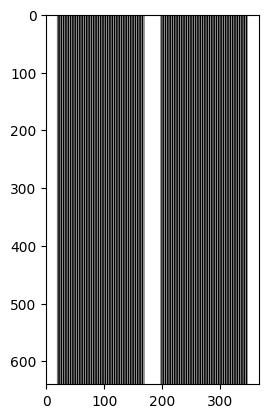

In [ ]:
! echo $'\n# K-Space (fully sampled):'
! head -n2 /content/data/data/kspace_fs.hdr

! echo $'\n# Pattern:'
! head -n2 /content/data/data/pattern_po_4.hdr

pattern = np.abs(cfl.readcfl("/content/data/data/pattern_po_4")) # 640 368 1 1 1
plt.imshow(pattern, cmap="gray")
plt.show()

# Multiplying to the mask
! bart fmac /content/data/data/kspace_fs /content/data/data/pattern_po_4 /content/data/kspace_ds

In [ ]:
!bart ecalib /content/data/kspace_ds sensitivities
!bart pics -l1 -r0.001 /content/data/kspace_ds sensitivities image_out2


Done.
2 maps.
ESPIRiT reconstruction.
Size: 235520 Samples: 67839 Acc: 3.47
l1-wavelet regularization: 0.001000
FISTA
Total Time: 7.774854


# Dimensions
640 368 1 1 2 1 1 1 1 1 1 1 1 1 1 1 
# Dimensions
640 368 1 15 2 1 1 1 1 1 1 1 1 1 1 1 
(640, 368, 2)


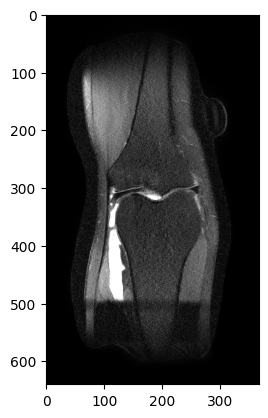

In [ ]:
! head -n2 image_out2.hdr
! head -n2 sensitivities.hdr
pics_reco = cfl.readcfl("image_out2")
pics_reco_sq = np.squeeze(pics_reco)
print(np.shape(pics_reco_sq))
vmax=0.5*np.max(np.abs(pics_reco))
# fig, axes = plt.subplots(figsize=(20,6), nrows=1, ncols=3, sharex=True, sharey=True)

plt.imshow(np.abs(pics_reco_sq[:,:,0]), cmap="gray", vmax=vmax)
plt.show()
# plt.imshow(np.abs(pics_reco_sq[:,:,1]), cmap="gray", vmax=vmax)
# plt.show()

### Plotting Fully sampled K space

In [ ]:
! bart fft -u -i 3 /content/data/kspace_ds kspace_fs_recon
! head -n2 /content/kspace_fs_recon.hdr

# Dimensions
640 368 1 15 1 1 1 1 1 1 1 1 1 1 1 1 


In [ ]:
%%bash
bart ecalib -r24 -m1 /content/data/data/kspace_fs coils_l
FFT_FLAG=$(bart bitmask 0 1)
COIL_FLAG=$(bart bitmask 3)
bart fft -i -u $FFT_FLAG /content/data/data/kspace_fs coil_image
bart fmac -C -s$COIL_FLAG coil_image coils_l image_ref


Done.


In [ ]:
! head -n2 kspace_fs_recon.hdr
! head -n2 image_ref.hdr

# Dimensions
640 368 1 15 1 1 1 1 1 1 1 1 1 1 1 1 
# Dimensions
640 368 1 1 1 1 1 1 1 1 1 1 1 1 1 1 


(640, 368)


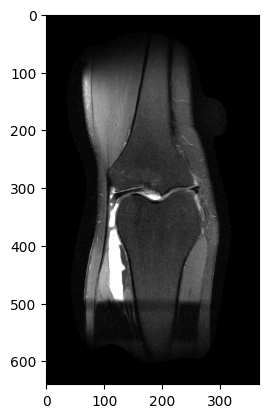

In [ ]:
pics_ref = cfl.readcfl("image_ref")
print(np.shape(pics_ref))
vmax=0.5*np.max(np.abs(pics_ref))
plt.imshow(np.abs(pics_ref), cmap="gray", vmax=vmax)
plt.show()


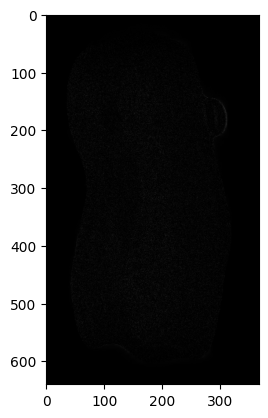

In [ ]:
diff_map = np.abs(pics_reco_sq[:,:,0])/np.max(np.abs(pics_reco_sq[:,:,0])) - np.abs(pics_ref)/np.max(np.abs(pics_ref))
plt.imshow(np.abs(diff_map), cmap="gray", vmax=1)
plt.show()

### Plotting Downsampled K space

In [ ]:
! bart fft -u -i 3 /content/data/kspace_ds kspace_DS_recon
! head -n2 kspace_DS_recon.hdr

# Dimensions
640 368 1 15 1 1 1 1 1 1 1 1 1 1 1 1 


In [ ]:
%%bash
bart ecalib -r24 -m1 /content/data/kspace_ds coils_l
FFT_FLAG=$(bart bitmask 0 1)
COIL_FLAG=$(bart bitmask 3)
bart fft -i -u $FFT_FLAG /content/data/kspace_ds coil_image
bart fmac -C -s$COIL_FLAG coil_image coils_l image_DS


Done.


(640, 368)


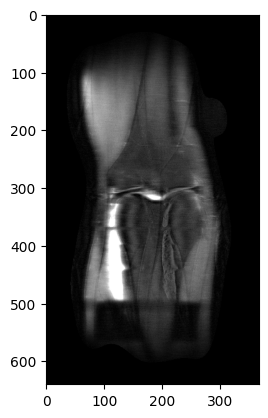

In [ ]:
pics_DS = cfl.readcfl("image_DS")
print(np.shape(pics_DS))
vmax=0.5*np.max(np.abs(pics_DS))
plt.imshow(np.abs(pics_DS), cmap="gray", vmax=vmax)
plt.show()

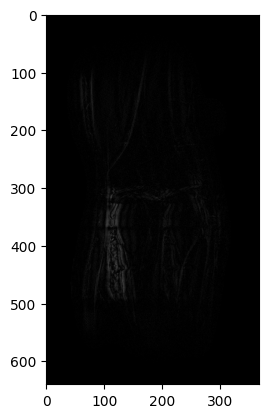

In [ ]:
diff_map = np.abs(pics_DS)/np.max(np.abs(pics_DS)) - np.abs(pics_ref)/np.max(np.abs(pics_ref))
plt.imshow(np.abs(diff_map), cmap="gray", vmax=1)
plt.show()

FASTMRI PARSING

In [ ]:
a = cfl.readcfl("/content/data/data/kspace_fs")
type(a)
print(a.shape)

(640, 368, 1, 15)


In [ ]:
b= cfl.writecfl("/content/data/data/kspace_fs_new", a )

In [ ]:
! head -n2 /content/data/data/kspace_fs_new.hdr

# Dimensions
640 368 1 15 


In [ ]:
%%bash
bart ecalib -r24 -m1 /content/data/data/kspace_fs_new coils_l
FFT_FLAG=$(bart bitmask 0 1)
COIL_FLAG=$(bart bitmask 3)
bart fft -i -u $FFT_FLAG /content/data/data/kspace_fs_new coil_image
bart fmac -C -s$COIL_FLAG coil_image coils_l image_ref_new

Done.


(640, 368)


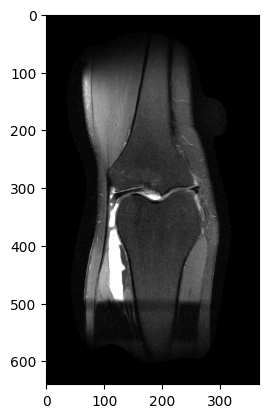

In [ ]:
pics_ref = cfl.readcfl("image_ref_new")
print(np.shape(pics_ref))
vmax=0.5*np.max(np.abs(pics_ref))
plt.imshow(np.abs(pics_ref), cmap="gray", vmax=vmax)
plt.show()

In [ ]:
# /home/tauheed/codesfromgithub/mri_together_2023/file_brain_AXT1POST_207_2070612.h5

In [ ]:
import h5py
import numpy as np

In [ ]:
mri_path="/content/drive/MyDrive/MRI/"
# data_path=mri_path+"data.zip"
# target_path=mri_path+"data"
h5_file_name="file_brain_AXT2_210_6001944"
file_name = mri_path+h5_file_name+'.h5'
hf= h5py.File(file_name)
print(file_name)

/content/drive/MyDrive/MRI/file_brain_AXT2_210_6001944.h5


In [ ]:
print('Keys:', list(hf.keys()))

Keys: ['ismrmrd_header', 'kspace', 'reconstruction_rss']


In [ ]:
volume_kspace = hf['kspace'][()]
print(volume_kspace.shape)

(16, 20, 768, 396)


In [ ]:
slice_no=1
slice_kspace = volume_kspace[slice_no,:,:,:]
type(slice_kspace)
print(slice_kspace.shape)
slice_kspace_format = np.transpose(slice_kspace, axes=[1,2,0])
print(slice_kspace_format.shape)
slice_kspace_format2= np.expand_dims(slice_kspace_format, axis=2)
print(slice_kspace_format2.shape)

def fastmri_to_bart(data_kspace, slice_no):
    if slice_no == None:
        slice_kspace = data_kspace
    else:
        slice_kspace = data_kspace[slice_no,:,:,:]
    slice_kspace_format = np.transpose(slice_kspace, axes=[1,2,0])
    slice_kspace_format2=np.expand_dims(slice_kspace_format, axis=2)
    return slice_kspace_format2

slice_wrapper = fastmri_to_bart(volume_kspace,1)
error = slice_wrapper - slice_kspace_format2
print(np.unique(error))




(20, 768, 396)
(768, 396, 20)
(768, 396, 1, 20)
[0.+0.j]


In [ ]:
cfl_path=mri_path+"CFL/"
cfl_file_name=cfl_path+h5_file_name+"_"+str(slice_no)
cfl.writecfl(cfl_file_name, slice_kspace_format2 )

In [ ]:
%%bash
bart ecalib -r24 -m1 /content/data/data/kspace_fs_fastmri_new coils_l
FFT_FLAG=$(bart bitmask 0 1)
COIL_FLAG=$(bart bitmask 3)
bart fft -i -u $FFT_FLAG /content/data/data/kspace_fs_fastmri_new coil_image
bart fmac -C -s$COIL_FLAG coil_image coils_l image_ref_new

Done.


(768, 396)


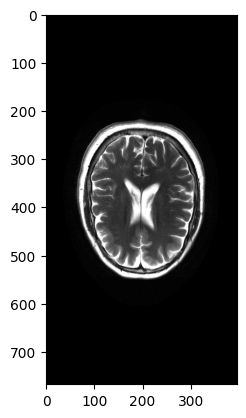

In [ ]:
pics_ref = cfl.readcfl("image_ref_new")
print(np.shape(pics_ref))
vmax=0.5*np.max(np.abs(pics_ref))
plt.imshow(np.abs(pics_ref), cmap="gray", vmax=vmax)
plt.show()

### FastMri based downsampling and Sense Recon using Bart

In [ ]:
!pip install fastmri

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.4/101.4 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.0/823.0 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 913.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.7 MB/s eta 0:00:00

In [ ]:
import fastmri
from fastmri.data import transforms as T

In [ ]:
slice_kspace = volume_kspace[1]
print(slice_kspace.shape)
reference=fastmri_to_bart(slice_kspace,None)
print(reference.shape)

(20, 768, 396)
(768, 396, 1, 20)


In [ ]:
slice_kspace2 = T.to_tensor(slice_kspace)
print(slice_kspace2.dtype)

torch.float32


In [ ]:
from fastmri.data.subsample import RandomMaskFunc
mask_func = RandomMaskFunc(center_fractions=[0.04], accelerations=[2])  # Create the mask function object

In [ ]:
masked_kspace = T.apply_mask(slice_kspace2, mask_func) # Apply the mask to k-space

In [ ]:
type(masked_kspace)
print(masked_kspace[0].dtype)
print(masked_kspace[0].shape)
masked_kspace_npy = masked_kspace[0].numpy()
masked_kspace_npy.shape
masked_kspace_C_npy = masked_kspace_npy[:,:,:,0] + 1j* masked_kspace_npy[:,:,:,1]
masked_kspace_C_npy.shape

k_fastmri_ds = fastmri_to_bart(masked_kspace_C_npy, None)
k_fastmri_ds.shape


torch.float32
torch.Size([20, 768, 396, 2])


(768, 396, 1, 20)

### Visualizing the Data

In [ ]:
cfl.writecfl("/content/data/data/kspace_ds_fastmri_new",k_fastmri_ds )
cfl.writecfl("/content/data/data/kspace_fs_fastmri_new",reference )

In [ ]:
%%bash
bart ecalib -r24 -m1 /content/data/data/kspace_ds_fastmri_new coils_l
FFT_FLAG=$(bart bitmask 0 1)
COIL_FLAG=$(bart bitmask 3)
bart fft -i -u $FFT_FLAG /content/data/data/kspace_ds_fastmri_new coil_image
bart fmac -C -s$COIL_FLAG coil_image coils_l image_ref_new_ds

Done.


(768, 396)


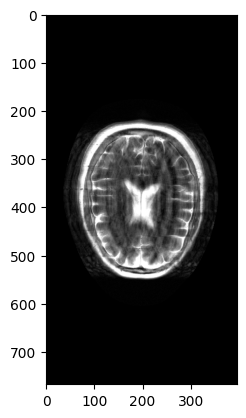

In [ ]:
pics_ds = cfl.readcfl("image_ref_new_ds")
print(np.shape(pics_ds))
vmax=0.5*np.max(np.abs(pics_ds))
plt.imshow(np.abs(pics_ds), cmap="gray", vmax=vmax)
plt.show()

In [ ]:
!bart ecalib /content/data/data/kspace_ds_fastmri_new sensitivities
!bart pics -l1 -r0.001 /content/data/data/kspace_ds_fastmri_new sensitivities image_out_fmri

Done.
2 maps.
ESPIRiT reconstruction.
Size: 304128 Samples: 144383 Acc: 2.11
l1-wavelet regularization: 0.001000
FISTA
Total Time: 13.962035


(768, 396, 2)


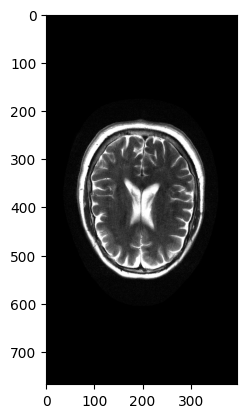

In [ ]:
pics_reco = cfl.readcfl("image_out_fmri")
vmax=0.5*np.max(np.abs(pics_reco))
pics_reco_sq = np.squeeze(pics_reco)
print(np.shape(pics_reco_sq))

# fig, axes = plt.subplots(figsize=(20,6), nrows=1, ncols=3, sharex=True, sharey=True)

plt.imshow(np.abs(pics_reco_sq[:,:,0]), cmap="gray", vmax=vmax)
plt.show()


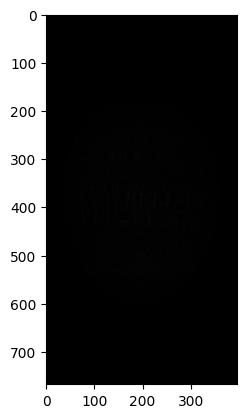

In [ ]:
diff_map = np.abs(pics_reco_sq[:,:,0])/np.max(np.abs(pics_reco_sq[:,:,0])) - np.abs(pics_ref)/np.max(np.abs(pics_ref))
plt.imshow(np.abs(diff_map), cmap="gray", vmax=1)
plt.show()

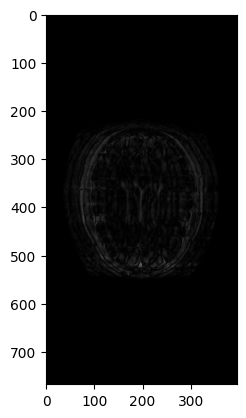

In [ ]:
diff_map = np.abs(pics_ds)/np.max(np.abs(pics_ds)) - np.abs(pics_ref)/np.max(np.abs(pics_ref))
plt.imshow(np.abs(diff_map), cmap="gray", vmax=1)
plt.show()